In [1]:
!pip install stopwords --quiet

import stopwords, csv

import tensorflow as tf

from tensorflow.keras import models, layers

In [2]:
def HelperClear(sentences):
  """
  Helper to Clear Your Sentences
  """
  output = sentences.lower().split()
  unlist = stopwords.get_stopwords("english")
  output = [i for i in output if i not in unlist]
  result = " ".join(output)
  return result

In [3]:
urlfile = "data/bbc-text.csv"

sentences = []; labels = []

with open(urlfile, 'r') as urli:
  reader = csv.reader(urli, delimiter=",")
  next(reader)
  for input in reader:
    labels.append(input[0])
    sentences.append(HelperClear(input[1]))

In [4]:
TotalToken = 1000

OutputLength = 120

In [5]:
train_split = int(0.8 * len(sentences))

train_input = sentences[:train_split]

validate_input = sentences[train_split:]

In [6]:
from tensorflow.keras.layers import TextVectorization

vectorizer = TextVectorization(max_tokens=TotalToken, output_sequence_length=OutputLength)

vectorizer.adapt(train_input)

In [7]:
train_label = labels[:train_split]

validate_label = labels[train_split:]

In [8]:
label_encoder = tf.keras.layers.StringLookup(num_oov_indices=0)

label_encoder.adapt(train_label)

In [9]:
train_label = label_encoder(train_label)

validate_label = label_encoder(validate_label)

train_label[:5].numpy()

array([4, 1, 0, 0, 3])

In [10]:
validate_label[:5].numpy()

array([3, 4, 2, 0, 0])

In [11]:
train_input = vectorizer(train_input)

validate_input = vectorizer(validate_input)

In [12]:
import warnings, os, urllib

warnings.filterwarnings('ignore')

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(TotalToken, 16, input_length=OutputLength),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(5, activation="softmax")
])

loss = "sparse_categorical_crossentropy"

model.compile(loss=loss, optimizer="adam", metrics=['accuracy'])

In [13]:
hist = model.fit(train_input, train_label, epochs=15, validation_data=(validate_input, validate_label))

In [14]:
model.evaluate(train_input, train_label, verbose=False)

[0.1215122863650322, 0.9797753095626831]

In [15]:
model.evaluate(validate_input, validate_label, verbose=False)

[0.21496239304542542, 0.9528089761734009]

In [16]:
if not os.path.exists("Helplot.py"):

  giturl = "https://raw.githubusercontent.com/Kelniit/Hut/refs/heads/main/Helplot.py"

  urllib.request.urlretrieve(giturl, "Helplot.py")

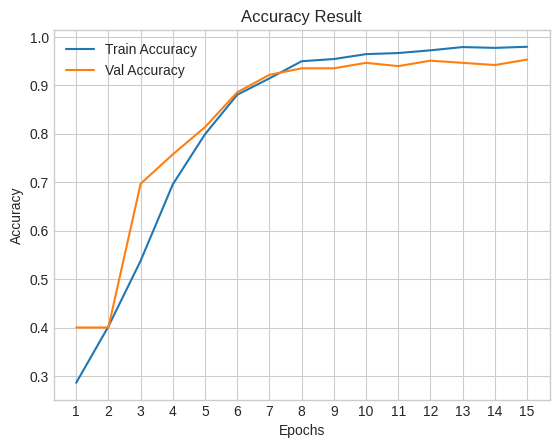

In [17]:
from Helplot import Helplot

plot = Helplot(hist)

plot.Relplot

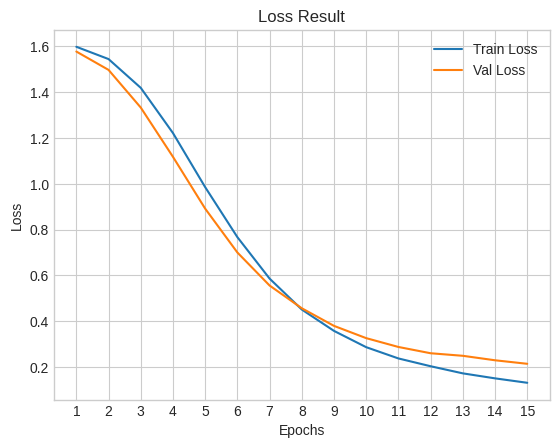

In [18]:
plot.Falplot